In [1]:
 # TODO：连接数据库
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
# 打开数据库连接
db = pymysql.connect(host='localhost',
                     user='root',
                     password='root',
                     db='test_db',
                     charset='utf8mb4',
                     cursorclass=pymysql.cursors.DictCursor)

In [2]:
#  # 查询person表
person_sql ="select count(sex) as F_count from person where sex = 'FEMALE' union all select count(sex) as M_count from person where sex = 'MALE'"
person_detail=pd.read_sql(sql=person_sql,con=db)

# 查询apply表
apply_sql = 'select applicant, status from apply'
apply_detail = pd.read_sql(sql=apply_sql, con=db) 
print(apply_detail)
apply_count_sql = "select count(*) from apply where status = 'REPAID' union all select count(*) from apply where status = 'RETURNING' union all select count(*) from apply where status = 'IN_PROGREESS' union all select count(*) from apply where status = 'OVERDUE'"
apply_count = pd.read_sql(sql=apply_count_sql, con=db) 


# # 查询call表
# call_sql =
# call_detail=pd.read_sql(sql=call_sql,con=db)

       applicant        status
0       20000001        REPAID
1       20000001        REPAID
2       20000001        REPAID
3       20000002     RETURNING
4       20000002  IN_PROGREESS
5       20000002        REPAID
6       20000003        REPAID
7       20000003  IN_PROGREESS
8       20000004  IN_PROGREESS
9       20000004        REPAID
10      20000004  IN_PROGREESS
11      20000004  IN_PROGREESS
12      20000004        REPAID
13      20000005        REPAID
14      20000005  IN_PROGREESS
15      20000005     RETURNING
16      20000006  IN_PROGREESS
17      20000006  IN_PROGREESS
18      20000007  IN_PROGREESS
19      20000008  IN_PROGREESS
20      20000009     RETURNING
21      20000009     RETURNING
22      20000009     RETURNING
23      20000009     RETURNING
24      20000009  IN_PROGREESS
25      20000010        REPAID
26      20000010  IN_PROGREESS
27      20000010  IN_PROGREESS
28      20000010     RETURNING
29      20000010  IN_PROGREESS
...          ...           ...
11617   

 ## 任务1：查询某个用户是否有处于OVERDUE状态的进件
 方法1: 通过代码查询 <br> 方法2: 通过sql语句查询

In [3]:
# 获取当前借款人是否有OVERDUE状态的进件（通过代码实现）
def get_od_apply(person_id):
    # 通过apply_detail拿到'applicant','status'两列的值
    apply_list_1 = apply_detail.values
    apply_list = apply_list_1.tolist()
    # 遍历apply_list,找到person_id，如果有OVERDUE状态进件则返回True，否则返回False
    for i in apply_list:
        if i[0] == person_id:
            if i[1] == 'OVERDUE':
                return True
            else:
                continue
        if i[0] > person_id:
            return False
    
print(get_od_apply(20000001))    # False
print(get_od_apply(20000035))    # True

False
True


In [4]:
# TODU：获取当前借款人是否有OVERDUE状态的进件（通过sql语句实现）

# sql查询用户id为20000035的用户是否有OVERDUE状态的进件
sql1 = "select applicant,status from apply where applicant =20000035 and status = 'OVERDUE'"
status1 = pd.read_sql(sql=sql1, con=db)
print(status1)


# # sql查询用户id为20000001的用户是否有OVERDUE状态的进件
sql2 = "select applicant,status from apply where applicant =20000001 and status = 'OVERDUE'"
stauts2 =  pd.read_sql(sql=sql2, con=db)
print(stauts2)

   applicant   status
0   20000035  OVERDUE
Empty DataFrame
Columns: [applicant, status]
Index: []


### 任务2：
1.根据给定金融借款数据，分析出在已知借款人中，男女的具体比例。根据查询结果，画出饼图进行展示。<br>
2.查询各种状态进件所占百分比，画出饼图进行展示。<br>
3.根据进件状态，分析出男人逾期的概率大还是女人逾期的概率大。<br>



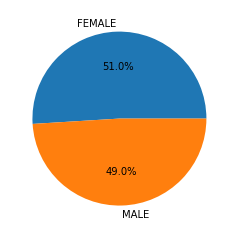

In [5]:
# TODU:查询男、女各占比例,并绘制成饼图
# 从person_info中获取'FEMALE','MALE'的人数
Female_value = person_detail["F_count"][0]
Male_value = person_detail["F_count"][1]
# 绘制饼图

labels = 'FEMALE', 'MALE'
fracs = [Female_value, Male_value]
explode = (0,0)
plt.pie(fracs, labels=labels, explode=explode, autopct='%1.1f%%')
plt.show()

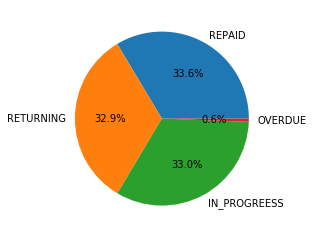

In [6]:
# TODU:查询各状态进件所占百分比,并绘制成饼图
# 从apply_detail中获取各状态进件的数量
apply_REPAID_count = apply_count["count(*)"][0]
apply_RETURNING_count = apply_count["count(*)"][1]
apply_IN_PROGREESS_count = apply_count["count(*)"][2]
apply_OVERDUE_count = apply_count["count(*)"][3]
labels = 'REPAID', 'RETURNING', 'IN_PROGREESS', 'OVERDUE'
fracs = [apply_REPAID_count, apply_RETURNING_count, apply_IN_PROGREESS_count, apply_OVERDUE_count]
explode = (0,0,0,0)
plt.pie(fracs, labels=labels, explode=explode, autopct='%1.1f%%')
plt.show()

In [7]:
# TODO：查询一共有多少女性及男性用户
male_count = person_detail["F_count"][1]
female_count = person_detail["F_count"][0]
# 计算male_count与female_count值

print('有%d名男性用户'%male_count)
print('有%d名女性用户'%female_count)

# 通过sql语句查询所有拥有逾期状态(OVERDUE)进件的女性用户数
sql = "select count(sex) from person a ,apply b where a.sex ='FEMALE' and b.status = 'OVERDUE' and a.id = b.applicant"
overdue_female_detail=pd.read_sql(sql=sql, con=db)
# 通过pandas读取数据库，计算逾期女性用户数量
overdue_female_count = overdue_female_detail["count(sex)"][0]
print('有%d名逾期女性用户'%overdue_female_count)

# 通过sql语句查询所有拥有逾期状态(OVERDUE)进件的男性用户数
sql = "select count(sex) from person a ,apply b where a.sex ='MALE' and b.status = 'OVERDUE' and a.id = b.applicant"
overdue_male_detail=pd.read_sql(sql=sql, con=db)
overdue_male_count = overdue_male_detail["count(sex)"][0]
# 通过pandas读取数据库，计算逾期男性用户数量
print('有%d名逾期男性用户'%overdue_male_count)

# 根据以上结果，分析出男人逾期的概率大还是女人逾期的概率大。
pro_male = overdue_male_count / male_count
pro_female = overdue_female_count / female_count
print('男人逾期概率为:%f'%pro_male)
print('女人逾期概率为:%f'%pro_female)

有2451名男性用户
有2549名女性用户
有25名逾期女性用户
有44名逾期男性用户
男人逾期概率为:0.017952
女人逾期概率为:0.009808


### 任务3：
查询每个人申请的进件数，绘制直方图<br>
通过观察直方图，判断用户是倾向于贷多笔款项，还是倾向于尽可能少的使用贷款<br>

In [ ]:
# # TODO：绘制单人申请进件数量的直方图（通过代码实现）

# # 通过apply_detail计算每个applicant出现的次数（即每个人申请的进件数）
# count = 
# # 绘制直方图
# plt.hist(count)
# plt.show()

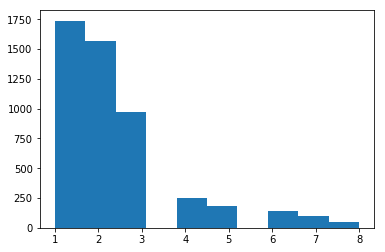

In [4]:
# TODO：绘制单人申请进件数量的直方图(通过sql语句实现)

# 通过sql语句查询每个applicant出现的次数（即每个人申请的进件数）
sql = "select applicant,count(applicant) from apply  group by applicant order by count(applicant)"
# 通过pandas读取
df = pd.read_sql(sql=sql,con=db)
df_count=df["count(applicant)"]
# print(df)
# 绘制直方图
plt.hist(df_count)
plt.show()

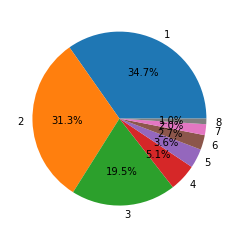

In [10]:
# TODO：绘制单人申请进件数量的分布圆饼图

# 通过sql语句查询每个applicant出现的次数（即每个人申请的进件数）
sql = "select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =1 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =2 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =3 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =4 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =5 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =6 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =7 union all select count(c.count_app) from (select applicant,count(applicant) as count_app from apply  group by applicant order by count(applicant)) c where c.count_app =8"
# 通过pandas读取
df = pd.read_sql(sql=sql,con=db)
count_1 = df["count(c.count_app)"][0]
count_2 = df["count(c.count_app)"][1]
count_3 = df["count(c.count_app)"][2]
count_4 = df["count(c.count_app)"][3]
count_5 = df["count(c.count_app)"][4]
count_6 = df["count(c.count_app)"][5]
count_7 = df["count(c.count_app)"][6]
count_8 = df["count(c.count_app)"][7]
labels = '1', '2', '3', '4', '5', '6', '7', '8'
fracs = [count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8]
# 绘制圆饼图
plt.pie(fracs, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')
plt.show()

### 任务4：一些其他简单查询
<br>
1.查询各进件金额的大致分布<br>
2.查询所有进件已偿还的总额度(代码及sql两种实现方式）<br>
3.查询手机号为xxx的用户的所有进件<br>
4.找出所有申请中状态(IN_PROGRESS)的进件，按金额重大到小排序<br>
5.查询所有拥有申请中状态(IN_PROGRESS)的进件的男性用户的姓名与申请金额，按金额重大到小排序<br>
6.绘制某个号码联系过的所有人的性别的分布情况<br>

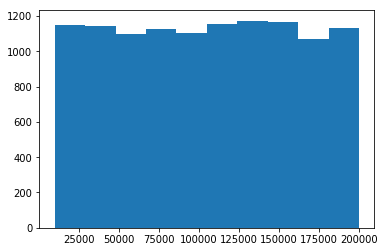

In [8]:
# 通过apply_detail查询各进件金额的大致分布
sql = "select amount from apply group by amount"
df = pd.read_sql(sql=sql,con=db)
amount = df["amount"]
# print(df)
plt.hist(amount)
plt.show()

In [27]:
# TODO：查询所有进件已偿还的总额度(代码)

# 通过apply_detail拿到'amount','status'两列的值
sql = "select amount from apply where `status` = 'REPAID'"
df = pd.read_sql(sql=sql,con=db)
apply_sum_amount =df.values
# print(apply_sum_amount)
# 保存额度 
amount = 0
# 遍历apply_sum_amount，计算amount的值
for i in range(len(apply_sum_amount)):
    amount += apply_sum_amount[i]
    i += 1
print(amount)

[413520083]


In [12]:
# TODO：查询所有进件已偿还的总额度(sql)
# 通过sql查询所有REPAID状态的进件的amount的和
sql = "select sum(amount) from apply where `status` = 'REPAID'"
df = pd.read_sql(sql=sql,con=db)
# print(df)
# 保存查询结果
result =df["sum(amount)"][0]
print(result)

413520083.0


In [35]:
# 查询手机号为xxx的用户的所有进件
# def get_apply_detail(phone):
#     sql = "select * from apply  where applicant = (select id  from person where phone = '%s')"
#     df = pd.read_sql(sql=(sql,phone),con=db)
# #     return 
#     print(df)

# # 校验
# get_apply_detail(1342416782)
sql = "select * from apply  where applicant = (select id  from person where phone = '1342416782')"
df = pd.read_sql(sql=sql,con=db)
df

,id,amount,term,job,city,parent_phone,colleague_phone,company_phone,applicant,status
0,100003,198250,17,计算机,北京,1362165895,1559871562,1362701196,20000002,RETURNING
1,100004,134146,6,计算机,北京,1358907060,1535069263,1556089919,20000002,IN_PROGREESS
2,100005,79090,14,计算机,北京,1369782099,1413818817,1831712858,20000002,REPAID


In [34]:
# TODO:找出所有申请中状态(IN_PROGRESS)的进件，按金额重大到小排序
sql = "select * from apply where `status` ='IN_PROGREESS' order by amount desc"
# 保存结果
df = pd.read_sql(sql=sql,con=db)
# 打印结果
df

,id,amount,term,job,city,parent_phone,colleague_phone,company_phone,applicant,status
0,104172,199989,10,计算机,北京,1825817952,1898110945,1489309357,20001776,IN_PROGREESS
1,105761,199964,8,计算机,北京,1875126572,1479484766,1556408277,20002445,IN_PROGREESS
2,111400,199963,11,计算机,北京,1424467481,1883071026,1441405189,20004904,IN_PROGREESS
3,105177,199943,16,计算机,北京,1403445900,1308723881,1322461563,20002204,IN_PROGREESS
4,101426,199943,19,计算机,北京,1313403557,1820598302,1509966047,20000609,IN_PROGREESS
5,103061,199903,12,计算机,北京,1478932738,1387788838,1478520179,20001304,IN_PROGREESS
6,111180,199872,21,计算机,北京,1349521104,1303908742,1497381702,20004801,IN_PROGREESS
7,102145,199866,10,计算机,北京,1819446233,1452954990,1491958042,20000913,IN_PROGREESS
8,109486,199863,19,计算机,北京,1300092742,1559065453,1382947694,20004073,IN_PROGREESS
9,101901,199853,23,计算机,北京,1365593272,1580855535,1371058044,20000817,IN_PROGREESS


In [36]:
#  TODO：查询所有拥有申请中状态(IN_PROGRESS)的进件的男性用户的姓名与申请金额，按金额重大到小排序
sql = "select a.applicant as id, b.name, a.amount from apply a inner join person b on a.applicant = b.id  and b.sex = 'MALE'  and a.status ='IN_PROGREESS' order by a.amount desc"
# 保存结果
df = pd.read_sql(sql=sql,con=db)
# 打印结果
df

,id,name,amount
0,20004904,李文荣,199963
1,20000913,陈柔云,199866
2,20004073,张志任,199863
3,20000817,涂乃辰,199853
4,20001835,王妤瑜,199801
5,20004438,李宛玲,199738
6,20000812,俞旭洁,199689
7,20004824,林诗雅,199588
8,20001455,林怡廷,199467
9,20002335,蔡家豪,199467


   count(c.sex)
0            17
1            12


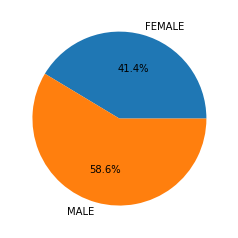

In [43]:
# 绘制某个号码联系过的所有人的性别的分布情况
def get_sex_distribution(phone):
    # 通过sql语句查询phone的联系人的sex值
    sql = "select count(c.sex) from (select b.sex from `call` a inner join person b on a.`to` = b.phone and a.`from` = '1412429664') c where c.sex = 'MALE' union all select count(c.sex) from (select b.sex from `call` a inner join person b on a.`to` = b.phone and a.`from` = '1412429664') c where c.sex = 'FEMALE'"
    df = pd.read_sql(sql=sql,con=db)
    # 保存sex一列的值，以list形式返回
    print(df)
    return df

# 校验
sd = get_sex_distribution(1412429664)
labels='FEMALE','MALE'
plt.pie([sd["count(c.sex)"][1],sd["count(c.sex)"][0]], labels=labels ,autopct = '%3.1f%%')
# plt.axis('equal')
plt.show()

In [44]:
# 关闭数据库连接
db.close()